<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_2_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n20.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,33.854746,60.769591,0.002143,104.626480,104.624374,0.002106
1,0.0,1.0,31.099208,82.696853,0.000936,123.796998,123.795256,0.001743
2,0.0,2.0,84.836367,75.958416,0.000239,170.795022,170.796336,-0.001313
3,0.0,3.0,46.297653,70.996198,-0.001429,127.292422,127.294040,-0.001618
4,0.0,4.0,26.514506,44.437063,-0.020969,80.930600,80.951862,-0.021261
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,65.847512,77.661382,-0.007982,153.500912,153.508054,-0.007142
119996,999.0,116.0,77.316076,63.845332,-0.002646,151.158761,151.160705,-0.001944
119997,999.0,117.0,35.032301,79.956943,-0.002675,124.986569,124.992098,-0.005529
119998,999.0,118.0,21.776429,36.722356,0.010583,68.509368,68.508389,0.000979


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,33.854746,60.769591,0.002143,104.626480,104.624374,0.002106
1,0.0,1.0,31.099208,82.696853,0.000936,123.796998,123.795256,0.001743
2,0.0,2.0,84.836367,75.958416,0.000239,170.795022,170.796336,-0.001313
3,0.0,3.0,46.297653,70.996198,-0.001429,127.292422,127.294040,-0.001618
4,0.0,4.0,26.514506,44.437063,-0.020969,80.930600,80.951862,-0.021261
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,65.847512,77.661382,-0.007982,153.500912,153.508054,-0.007142
119996,999.0,116.0,77.316076,63.845332,-0.002646,151.158761,151.160705,-0.001944
119997,999.0,117.0,35.032301,79.956943,-0.002675,124.986569,124.992098,-0.005529
119998,999.0,118.0,21.776429,36.722356,0.010583,68.509368,68.508389,0.000979


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    33.854746  60.769591  0.002143  104.626480  104.624374  0.002106
      1.0    31.099208  82.696853  0.000936  123.796998  123.795256  0.001743
      2.0    84.836367  75.958416  0.000239  170.795022  170.796336 -0.001313
      3.0    46.297653  70.996198 -0.001429  127.292422  127.294040 -0.001618
      4.0    26.514506  44.437063 -0.020969   80.930600   80.951862 -0.021261
...                ...        ...       ...         ...         ...       ...
999.0 115.0  65.847512  77.661382 -0.007982  153.500912  153.508054 -0.007142
      116.0  77.316076  63.845332 -0.002646  151.158761  151.160705 -0.001944
      117.0  35.032301  79.956943 -0.002675  124.986569  124.992098 -0.005529
      118.0  21.776429  36.722356  0.010583   68.509368   68.508389  0.000979
      119.0  23.956522  62.427394 -0.004927   96.378989   96.390240 -0.011251

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    33.854746  60.769591  0.002143  104.626480  104.624374  0.002106
      1.0    31.099208  82.696853  0.000936  123.796998  123.795256  0.001743
      2.0    84.836367  75.958416  0.000239  170.795022  170.796336 -0.001313
      3.0    46.297653  70.996198 -0.001429  127.292422  127.294040 -0.001618
      4.0    26.514506  44.437063 -0.020969   80.930600   80.951862 -0.021261
...                ...        ...       ...         ...         ...       ...
999.0 115.0  65.847512  77.661382 -0.007982  153.500912  153.508054 -0.007142
      116.0  77.316076  63.845332 -0.002646  151.158761  151.160705 -0.001944
      117.0  35.032301  79.956943 -0.002675  124.986569  124.992098 -0.005529
      118.0  21.776429  36.722356  0.010583   68.509368   68.508389  0.000979
      119.0  23.956522  62.427394 -0.004927   96.378989   96.390240 -0.011251

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,33.854746,60.769591,0.002143,104.626480,104.624374,0.002106
1,0.0,1.0,31.099208,82.696853,0.000936,123.796998,123.795256,0.001743
2,0.0,2.0,84.836367,75.958416,0.000239,170.795022,170.796336,-0.001313
3,0.0,3.0,46.297653,70.996198,-0.001429,127.292422,127.294040,-0.001618
4,0.0,4.0,26.514506,44.437063,-0.020969,80.930600,80.951862,-0.021261
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,65.847512,77.661382,-0.007982,153.500912,153.508054,-0.007142
119996,999.0,116.0,77.316076,63.845332,-0.002646,151.158761,151.160705,-0.001944
119997,999.0,117.0,35.032301,79.956943,-0.002675,124.986569,124.992098,-0.005529
119998,999.0,118.0,21.776429,36.722356,0.010583,68.509368,68.508389,0.000979


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    33.854746  60.769591  0.002143  104.626480  104.624374  0.002106
      1.0    31.099208  82.696853  0.000936  123.796998  123.795256  0.001743
      2.0    84.836367  75.958416  0.000239  170.795022  170.796336 -0.001313
      3.0    46.297653  70.996198 -0.001429  127.292422  127.294040 -0.001618
      4.0    26.514506  44.437063 -0.020969   80.930600   80.951862 -0.021261
...                ...        ...       ...         ...         ...       ...
999.0 115.0  65.847512  77.661382 -0.007982  153.500912  153.508054 -0.007142
      116.0  77.316076  63.845332 -0.002646  151.158761  151.160705 -0.001944
      117.0  35.032301  79.956943 -0.002675  124.986569  124.992098 -0.005529
      118.0  21.776429  36.722356  0.010583   68.509368   68.508389  0.000979
      119.0  23.956522  62.427394 -0.004927   96.378989   96.390240 -0.011251

[120000 rows x 6 columns]

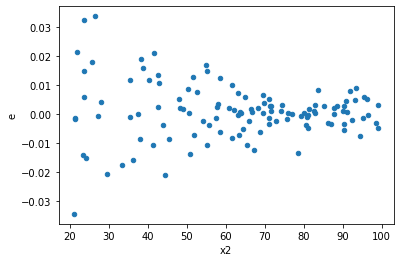

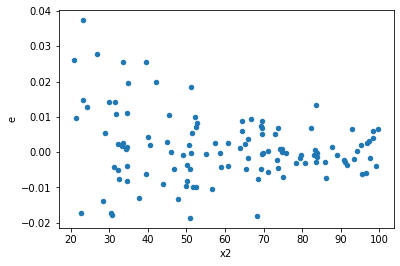

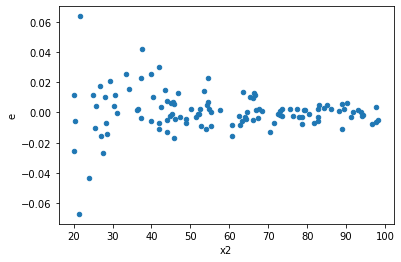

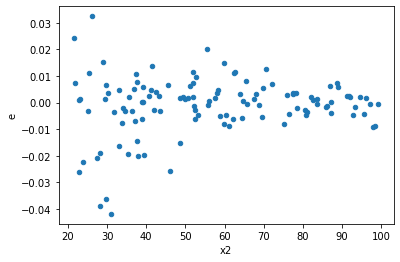

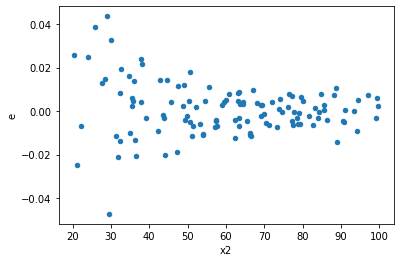

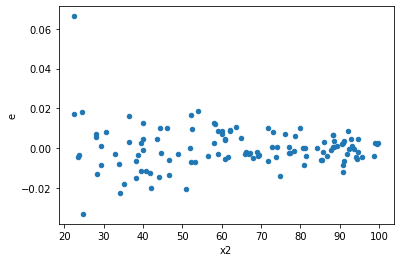

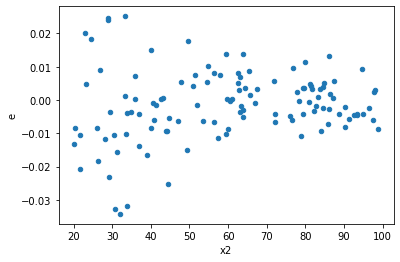

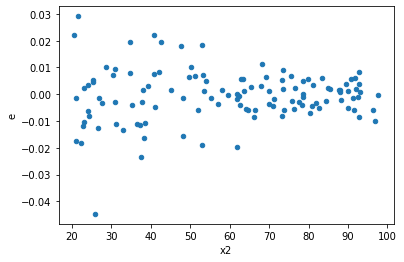

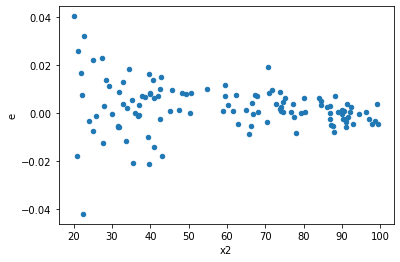

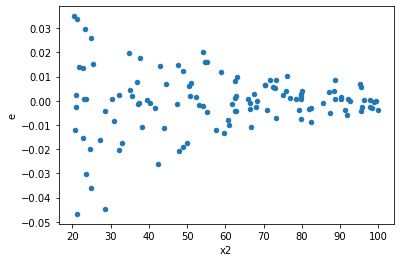

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,0.009094741340706569,0.0008115236838463568,0.00019771176827622976,1.7641819214051236e-05,0.08922999054564752,1.392280645793561e-13,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,0.007354995614567502,0.0008760532153311248,0.000159891209012337,1.904463511589402e-05,0.11910995753634308,3.256831681950693e-11,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,0.019391705719087916,0.0012842615427506522,0.0004215588199801721,2.791872919023157e-05,0.06622736345913655,3.7432661451048497e-16,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,0.01072696996014017,0.0010941130862901433,0.00023319499913348197,2.3785067093263986e-05,0.10199647154375423,1.807940704574932e-12,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,0.013095062668068301,0.0014652866415262589,0.00028467527539278916,3.1854057424483886e-05,0.11189611525107794,1.027958476914797e-11,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,0.011220935721674652,0.0011470093976919929,0.00024393338525379677,2.4934986906347672e-05,0.10222047662891426,1.8846117961992596e-12,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,0.009803226584180081,0.0013588578477465758,0.00021311362139521915,2.954038799449078e-05,0.138613326548978,4.993890140063904e-10,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,0.008160442266569761,0.001030289195861437,0.00017740091883847308,2.2397591214379068e-05,0.12625408797782214,9.405973612261032e-11,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,0.010010380671931626,0.0006694326473514455,0.0002176169711289484,1.4552883638074902e-05,0.06687384519037179,4.557312189039859e-16,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64